In [10]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

model = InceptionV3(weights = "imagenet", include_top = False)


In [11]:
IMG_SIZE = 299
BATCH_SIZE = 64
EPOCHS = 10
MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [12]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [15]:
def predicyFramesFromVideo(path):
    pics = load_video(path)
    new_pics = []
    for image in pics:
        print(len(image), image, image[0])
        image = img_to_array(image)
        image = image.reshape(1, 299,299,3)
        image = preprocess_input(image)
        new_pics.append(image)
        
#     predictions = []
#     for image in new_pics:
#         yhat = model.predict(image)
#         predictions.append(yhat)
#     encoded_predictions = []
#     for yhat in predictions:
#         label = decode_predictions(yhat)
#         label = label[0][0]
#         encoded_predictions.append(label)
#     outputs = []
#     for label in encoded_predictions:
#         outputs.append(label[1])
#     return new_pics, outputs

In [16]:
values = predicyFramesFromVideo('chele.mp4')

299 [[[102  91  76]
  [103  92  77]
  [104  93  78]
  ...
  [124 118 140]
  [124 118 140]
  [124 118 140]]

 [[102  91  76]
  [103  92  77]
  [103  92  77]
  ...
  [124 118 141]
  [124 118 141]
  [124 118 141]]

 [[102  91  76]
  [103  92  77]
  [103  92  77]
  ...
  [124 118 142]
  [124 118 142]
  [123 117 142]]

 ...

 [[ 56  60  45]
  [ 56  60  45]
  [ 56  60  45]
  ...
  [ 79  83  68]
  [ 79  83  68]
  [ 79  83  68]]

 [[ 56  60  45]
  [ 56  60  45]
  [ 56  60  45]
  ...
  [ 79  83  68]
  [ 79  83  68]
  [ 79  83  68]]

 [[ 56  60  45]
  [ 56  60  45]
  [ 56  60  45]
  ...
  [ 79  83  68]
  [ 79  83  68]
  [ 79  83  68]]] [[102  91  76]
 [103  92  77]
 [104  93  78]
 [105  94  77]
 [108  94  76]
 [109  96  75]
 [111  98  77]
 [112  99  77]
 [114 101  76]
 [116 104  78]
 [120 108  82]
 [125 113  86]
 [131 118  91]
 [135 123  94]
 [138 127  97]
 [144 133 100]
 [153 142 108]
 [149 138 102]
 [145 133  98]
 [146 132  98]
 [145 128  96]
 [139 122  92]
 [138 120  93]
 [134 117  92]
 [130 

299 [[[100  92  70]
  [101  93  71]
  [102  94  72]
  ...
  [123 116 134]
  [122 117 134]
  [121 115 135]]

 [[100  92  70]
  [100  92  70]
  [101  93  71]
  ...
  [122 116 136]
  [121 117 136]
  [120 116 137]]

 [[100  92  70]
  [100  92  70]
  [100  92  70]
  ...
  [121 117 139]
  [121 117 139]
  [120 116 140]]

 ...

 [[ 49  52  40]
  [ 49  52  40]
  [ 49  52  40]
  ...
  [ 73  77  62]
  [ 72  76  61]
  [ 72  76  61]]

 [[ 49  52  40]
  [ 49  52  40]
  [ 49  52  40]
  ...
  [ 73  77  62]
  [ 72  76  61]
  [ 72  76  61]]

 [[ 49  52  40]
  [ 49  52  40]
  [ 49  52  40]
  ...
  [ 73  77  62]
  [ 73  77  62]
  [ 73  77  62]]] [[100  92  70]
 [101  93  71]
 [102  94  72]
 [103  95  73]
 [104  96  73]
 [108  97  74]
 [111  97  75]
 [113 101  77]
 [116 104  78]
 [122 110  85]
 [128 116  88]
 [138 126  97]
 [148 136 107]
 [172 160 131]
 [198 186 159]
 [207 196 168]
 [192 180 149]
 [181 166 134]
 [171 153 121]
 [165 146 112]
 [156 135 104]
 [149 128 102]
 [142 123  99]
 [138 119  96]
 [132 

 [123 119 138]]
299 [[[118 112 107]
  [119 113 108]
  [119 113 108]
  ...
  [122 119 140]
  [122 119 140]
  [123 119 142]]

 [[118 112 107]
  [118 112 107]
  [119 113 108]
  ...
  [123 119 142]
  [123 119 142]
  [123 117 144]]

 [[118 111 109]
  [118 111 109]
  [119 112 110]
  ...
  [123 119 143]
  [123 119 143]
  [123 116 144]]

 ...

 [[ 57  68  79]
  [ 58  68  80]
  [ 58  69  80]
  ...
  [ 86  92  93]
  [ 86  92  93]
  [ 86  92  93]]

 [[ 57  68  79]
  [ 58  69  80]
  [ 58  69  80]
  ...
  [ 86  92  93]
  [ 86  92  93]
  [ 86  92  93]]

 [[ 57  68  79]
  [ 58  69  80]
  [ 58  69  80]
  ...
  [ 85  91  92]
  [ 85  91  92]
  [ 85  91  92]]] [[118 112 107]
 [119 113 108]
 [119 113 108]
 [121 115 108]
 [121 115 108]
 [123 117 108]
 [124 117 109]
 [129 116 111]
 [134 117 115]
 [142 124 122]
 [152 137 128]
 [157 141 133]
 [160 149 145]
 [178 171 173]
 [204 200 208]
 [224 220 229]
 [222 221 221]
 [221 220 215]
 [207 204 190]
 [194 174 158]
 [187 162 142]
 [174 145 130]
 [169 136 132]
 [168

 [120 113 125]]
299 [[[114 101  80]
  [114 101  80]
  [115 102  81]
  ...
  [120 113 125]
  [120 113 125]
  [120 113 125]]

 [[114 101  80]
  [114 101  80]
  [115 102  81]
  ...
  [121 114 126]
  [121 114 126]
  [121 114 126]]

 [[113  99  81]
  [113  99  81]
  [114 100  82]
  ...
  [121 114 126]
  [121 114 128]
  [121 114 128]]

 ...

 [[ 31  32  20]
  [ 31  32  20]
  [ 31  32  20]
  ...
  [ 71  75  60]
  [ 71  75  60]
  [ 70  74  59]]

 [[ 31  32  20]
  [ 32  33  20]
  [ 32  33  21]
  ...
  [ 71  75  60]
  [ 71  75  60]
  [ 70  74  59]]

 [[ 32  33  21]
  [ 32  33  21]
  [ 33  34  22]
  ...
  [ 71  75  60]
  [ 71  75  60]
  [ 70  74  59]]] [[114 101  80]
 [114 101  80]
 [115 102  81]
 [118 105  84]
 [121 106  86]
 [123 108  87]
 [125 110  87]
 [129 113  88]
 [134 117  90]
 [139 122  92]
 [148 128  97]
 [154 135 100]
 [164 143 109]
 [177 157 127]
 [187 169 148]
 [209 193 185]
 [228 216 215]
 [227 220 223]
 [227 221 225]
 [225 221 213]
 [208 202 184]
 [195 184 156]
 [193 177 145]
 [187

 [105 102 110]]
299 [[[135 115  95]
  [139 120  97]
  [145 124  99]
  ...
  [115 106 117]
  [120 112 122]
  [123 114 125]]

 [[134 115  95]
  [139 120  97]
  [145 124  99]
  ...
  [120 111 122]
  [123 114 125]
  [123 114 125]]

 [[132 114  93]
  [138 119  96]
  [144 124  98]
  ...
  [125 111 115]
  [129 113 116]
  [130 110 125]]

 ...

 [[ 39  41  26]
  [ 39  41  26]
  [ 39  41  26]
  ...
  [ 79  83  68]
  [ 79  83  68]
  [ 79  83  68]]

 [[ 40  42  27]
  [ 40  42  27]
  [ 40  42  27]
  ...
  [ 79  83  68]
  [ 79  83  68]
  [ 79  83  68]]

 [[ 39  41  29]
  [ 39  41  29]
  [ 39  41  29]
  ...
  [ 79  83  68]
  [ 79  83  68]
  [ 79  83  68]]] [[135 115  95]
 [139 120  97]
 [145 124  99]
 [155 131 107]
 [162 139 109]
 [171 146 117]
 [178 156 131]
 [190 173 156]
 [212 200 192]
 [221 218 215]
 [220 221 224]
 [222 222 222]
 [225 221 215]
 [216 207 192]
 [197 184 161]
 [191 174 145]
 [190 172 139]
 [188 169 133]
 [181 162 126]
 [179 160 126]
 [170 152 123]
 [166 148 121]
 [157 142 116]
 [151

 [ 98  90 109]]
299 [[[117 102  80]
  [118 103  81]
  [120 105  83]
  ...
  [ 93  87  94]
  [ 95  89  96]
  [ 95  89  96]]

 [[117 102  80]
  [118 103  81]
  [120 105  83]
  ...
  [ 97  91  98]
  [ 97  91  98]
  [ 97  91  98]]

 [[117 102  80]
  [118 103  81]
  [120 105  83]
  ...
  [100  94 100]
  [100  94 100]
  [100  94 100]]

 ...

 [[ 62  64  47]
  [ 63  65  48]
  [ 64  66  49]
  ...
  [ 81  83  68]
  [ 81  83  68]
  [ 81  83  68]]

 [[ 63  65  47]
  [ 63  65  48]
  [ 64  66  49]
  ...
  [ 81  83  68]
  [ 81  83  68]
  [ 81  83  68]]

 [[ 64  66  49]
  [ 64  66  49]
  [ 65  67  50]
  ...
  [ 81  83  68]
  [ 81  83  68]
  [ 81  83  68]]] [[117 102  80]
 [118 103  81]
 [120 105  83]
 [123 108  86]
 [124 109  87]
 [129 114  92]
 [135 119  96]
 [141 122  97]
 [145 127  98]
 [153 135 104]
 [162 145 108]
 [173 156 121]
 [185 168 140]
 [198 184 165]
 [221 211 200]
 [229 219 220]
 [226 221 223]
 [225 220 222]
 [226 219 215]
 [209 200 175]
 [199 184 147]
 [190 173 131]
 [186 166 125]
 [179

299 [[[148 107  80]
  [149 108  81]
  [155 114  87]
  ...
  [ 83  76  79]
  [ 97  90  93]
  [113 106 109]]

 [[147 105  78]
  [147 105  78]
  [151 110  83]
  ...
  [121 114 117]
  [153 146 149]
  [162 155 158]]

 [[140 100  72]
  [140 100  72]
  [145 105  78]
  ...
  [156 149 152]
  [169 162 165]
  [159 152 155]]

 ...

 [[135 130 100]
  [134 129  99]
  [135 130 100]
  ...
  [ 82  84  67]
  [ 82  84  67]
  [ 82  84  67]]

 [[130 125  95]
  [128 123  94]
  [126 121  92]
  ...
  [ 82  84  67]
  [ 82  84  67]
  [ 82  84  67]]

 [[115 110  82]
  [113 108  80]
  [103  99  71]
  ...
  [ 82  84  67]
  [ 82  84  67]
  [ 82  84  67]]] [[148 107  80]
 [149 108  81]
 [155 114  87]
 [159 118  91]
 [166 125  95]
 [175 132  99]
 [183 141 106]
 [188 150 118]
 [200 168 143]
 [209 188 170]
 [227 216 209]
 [223 223 223]
 [223 221 224]
 [226 219 226]
 [227 217 214]
 [213 198 178]
 [196 179 150]
 [188 170 135]
 [180 161 124]
 [170 153 112]
 [165 148 109]
 [159 142 106]
 [156 137 103]
 [153 133 101]
 [148 

  [ 75  75  59]]] [[154 104  65]
 [156 105  66]
 [159 108  69]
 [167 116  77]
 [172 119  81]
 [186 132  94]
 [190 138 100]
 [186 141 102]
 [179 145 110]
 [175 151 125]
 [216 202 180]
 [219 208 183]
 [184 170 137]
 [170 153 116]
 [159 142 103]
 [154 137  99]
 [151 135  99]
 [146 131  97]
 [142 129  97]
 [137 123  95]
 [135 123  95]
 [135 122  95]
 [134 120  95]
 [134 119  97]
 [133 118  96]
 [133 118  96]
 [131 116  94]
 [130 115  93]
 [129 114  94]
 [127 114  93]
 [127 114  92]
 [127 114  92]
 [127 114  92]
 [127 114  92]
 [126 114  93]
 [126 113  92]
 [128 113  93]
 [127 112  92]
 [127 112  92]
 [127 112  92]
 [127 112  92]
 [127 112  92]
 [127 112  92]
 [127 112  92]
 [127 112  92]
 [128 113  92]
 [128 113  92]
 [128 113  93]
 [128 113  93]
 [128 113  93]
 [128 113  93]
 [128 113  93]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [129 114  94]
 [130 1

  [ 47  51  65]]] [[114 103  84]
 [115 105  83]
 [116 106  84]
 [117 107  85]
 [117 107  85]
 [118 108  86]
 [118 108  86]
 [121 108  85]
 [123 109  82]
 [125 111  85]
 [130 111  87]
 [133 113  88]
 [139 113  90]
 [141 116  91]
 [140 118  90]
 [140 118  90]
 [140 121  90]
 [144 125  93]
 [146 125  92]
 [144 122  87]
 [150 124  89]
 [157 130  92]
 [162 138  99]
 [173 152 111]
 [182 161 121]
 [188 167 127]
 [193 176 145]
 [208 198 177]
 [221 214 197]
 [224 215 200]
 [215 204 184]
 [202 186 158]
 [196 175 137]
 [191 167 119]
 [190 165 110]
 [185 159 102]
 [179 154  98]
 [176 152 100]
 [173 149 102]
 [170 148 103]
 [164 143 103]
 [158 137 102]
 [155 136 102]
 [151 132 101]
 [147 130 100]
 [147 128 101]
 [143 128 101]
 [141 126 102]
 [139 124 102]
 [138 123 100]
 [138 124  99]
 [137 123  98]
 [137 123  98]
 [136 121  98]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 121  99]
 [136 1

 [105  98  98]]
299 [[[108  95  72]
  [108  95  72]
  [109  96  73]
  ...
  [106  99  99]
  [107 100 100]
  [107 100 100]]

 [[108  95  72]
  [108  95  72]
  [109  96  73]
  ...
  [108 101 101]
  [108 101 101]
  [108 101 101]]

 [[108  95  72]
  [108  95  72]
  [109  96  73]
  ...
  [109 100 101]
  [109 100 101]
  [109 100 101]]

 ...

 [[122 119  68]
  [122 119  68]
  [122 119  68]
  ...
  [ 82  84  58]
  [ 81  83  57]
  [ 81  83  57]]

 [[118 115  64]
  [118 115  64]
  [118 115  64]
  ...
  [ 82  84  58]
  [ 81  83  57]
  [ 81  83  57]]

 [[132 129  78]
  [131 128  77]
  [130 127  76]
  ...
  [ 86  86  61]
  [ 85  86  60]
  [ 85  86  60]]] [[108  95  72]
 [108  95  72]
 [109  96  73]
 [109  96  73]
 [109  97  71]
 [109  97  71]
 [111  99  73]
 [109  96  71]
 [110  96  69]
 [115  99  70]
 [128 113  74]
 [143 129  85]
 [148 136  84]
 [136 121  71]
 [110  92  50]
 [ 74  53  26]
 [ 40  20   2]
 [ 34  15   1]
 [ 34  17   6]
 [ 34  17   5]
 [ 37  17   4]
 [ 41  19   5]
 [ 53  28  11]
 [ 65

 [104  97  97]]
299 [[[100  89  70]
  [100  89  70]
  [102  91  72]
  ...
  [104  97  97]
  [105  98  98]
  [105  98  98]]

 [[100  89  70]
  [100  89  70]
  [102  91  72]
  ...
  [109 100 100]
  [109 100 101]
  [110 101 101]]

 [[100  89  70]
  [100  89  70]
  [102  91  72]
  ...
  [111 101 104]
  [111 101 105]
  [113 103 106]]

 ...

 [[ 48  49  26]
  [ 48  49  26]
  [ 47  48  25]
  ...
  [ 73  75  58]
  [ 73  75  58]
  [ 73  75  58]]

 [[ 48  49  26]
  [ 48  49  26]
  [ 47  48  25]
  ...
  [ 73  75  58]
  [ 73  75  58]
  [ 73  75  58]]

 [[ 49  50  27]
  [ 49  50  27]
  [ 48  49  26]
  ...
  [ 73  75  58]
  [ 73  75  58]
  [ 73  75  58]]] [[100  89  70]
 [100  89  70]
 [102  91  72]
 [102  91  72]
 [103  92  73]
 [103  92  73]
 [104  93  74]
 [104  93  75]
 [105  94  75]
 [105  94  75]
 [105  94  75]
 [106  95  76]
 [106  95  76]
 [108  97  78]
 [109  98  79]
 [112  99  78]
 [115 100  80]
 [114 101  80]
 [114 101  80]
 [116 101  81]
 [118 103  83]
 [120 105  85]
 [122 107  85]
 [125

 [121 117 128]]
299 [[[109  62  53]
  [109  62  53]
  [109  62  53]
  ...
  [120 118 128]
  [121 119 129]
  [121 119 129]]

 [[109  62  53]
  [109  62  53]
  [109  62  53]
  ...
  [123 121 131]
  [124 121 132]
  [124 121 132]]

 [[108  61  52]
  [108  61  52]
  [108  61  52]
  ...
  [126 124 135]
  [126 124 135]
  [126 124 135]]

 ...

 [[ 60  63  51]
  [ 60  63  51]
  [ 59  62  50]
  ...
  [ 76  82  69]
  [ 76  82  69]
  [ 76  82  69]]

 [[ 60  63  51]
  [ 60  63  51]
  [ 59  62  50]
  ...
  [ 76  82  69]
  [ 76  82  69]
  [ 76  82  69]]

 [[ 60  63  51]
  [ 60  63  51]
  [ 59  62  50]
  ...
  [ 76  82  69]
  [ 76  82  69]
  [ 76  82  69]]] [[109  62  53]
 [109  62  53]
 [109  62  53]
 [109  62  53]
 [109  62  53]
 [109  62  53]
 [112  64  55]
 [115  65  57]
 [118  67  59]
 [120  68  60]
 [122  71  63]
 [123  72  64]
 [126  75  67]
 [128  77  69]
 [133  79  72]
 [133  80  73]
 [134  80  73]
 [132  78  71]
 [124  70  64]
 [120  69  61]
 [116  64  57]
 [109  57  51]
 [101  52  47]
 [ 93

 [115 112 139]]
299 [[[ 30  20  19]
  [ 30  20  19]
  [ 30  20  19]
  ...
  [117 118 141]
  [117 118 141]
  [116 116 142]]

 [[ 34  24  23]
  [ 34  24  23]
  [ 34  24  23]
  ...
  [117 117 142]
  [117 117 142]
  [116 116 142]]

 [[ 37  30  28]
  [ 37  30  28]
  [ 37  30  28]
  ...
  [115 115 143]
  [114 116 143]
  [114 116 142]]

 ...

 [[ 11  12   0]
  [ 11  12   0]
  [ 12  13   1]
  ...
  [ 78  82  65]
  [ 78  82  65]
  [ 78  82  65]]

 [[ 12  13   1]
  [ 12  13   1]
  [ 12  13   1]
  ...
  [ 78  82  65]
  [ 78  82  65]
  [ 78  82  65]]

 [[ 14  16   1]
  [ 14  16   1]
  [ 14  16   1]
  ...
  [ 78  82  65]
  [ 78  82  65]
  [ 78  82  65]]] [[ 30  20  19]
 [ 30  20  19]
 [ 30  20  19]
 [ 30  20  19]
 [ 34  24  23]
 [ 37  27  26]
 [ 36  27  25]
 [ 38  29  24]
 [ 44  35  28]
 [ 53  43  34]
 [ 64  48  36]
 [ 67  51  34]
 [ 70  52  33]
 [ 70  52  33]
 [ 69  49  31]
 [ 65  43  23]
 [ 65  40  18]
 [ 63  39  17]
 [ 63  39  17]
 [ 63  39  17]
 [ 63  39  17]
 [ 62  38  17]
 [ 58  36  17]
 [ 54

 [125 121 133]]
299 [[[ 23  13  21]
  [ 23  13  21]
  [ 23  13  21]
  ...
  [125 121 133]
  [125 121 133]
  [125 121 133]]

 [[ 24  12  24]
  [ 24  12  24]
  [ 24  12  24]
  ...
  [125 121 134]
  [125 121 134]
  [125 121 134]]

 [[ 24  12  24]
  [ 24  12  24]
  [ 24  12  24]
  ...
  [126 121 137]
  [126 121 137]
  [126 121 137]]

 ...

 [[ 32  38  27]
  [ 30  36  25]
  [ 30  36  25]
  ...
  [ 78  85  69]
  [ 78  85  69]
  [ 78  85  69]]

 [[ 32  38  27]
  [ 31  36  26]
  [ 31  36  26]
  ...
  [ 78  85  69]
  [ 78  85  69]
  [ 78  85  69]]

 [[ 33  39  28]
  [ 32  38  27]
  [ 32  38  27]
  ...
  [ 78  85  69]
  [ 78  85  69]
  [ 78  85  69]]] [[ 23  13  21]
 [ 23  13  21]
 [ 23  13  21]
 [ 24  15  23]
 [ 26  17  23]
 [ 28  16  24]
 [ 33  22  28]
 [ 36  28  29]
 [ 39  34  30]
 [ 40  36  31]
 [ 50  45  41]
 [ 56  51  47]
 [ 62  56  50]
 [ 74  68  59]
 [ 78  72  63]
 [ 80  75  66]
 [ 82  76  65]
 [ 86  79  65]
 [ 87  79  67]
 [ 89  81  69]
 [ 92  84  72]
 [ 95  88  76]
 [ 93  88  75]
 [ 93

 [126 121 137]]
299 [[[ 17  10  18]
  [ 18  11  19]
  [ 19  13  19]
  ...
  [126 121 137]
  [126 121 137]
  [126 121 137]]

 [[ 16  10  16]
  [ 18  12  18]
  [ 19  13  19]
  ...
  [126 121 138]
  [126 121 138]
  [126 121 138]]

 [[ 18  11  21]
  [ 19  12  21]
  [ 19  12  21]
  ...
  [126 122 142]
  [126 122 142]
  [126 122 142]]

 ...

 [[ 20  28  18]
  [ 20  28  18]
  [ 20  28  18]
  ...
  [ 81  84  72]
  [ 81  84  72]
  [ 81  84  72]]

 [[ 22  28  19]
  [ 22  28  19]
  [ 22  28  19]
  ...
  [ 80  83  71]
  [ 80  83  71]
  [ 80  83  71]]

 [[ 25  31  22]
  [ 25  31  22]
  [ 25  31  22]
  ...
  [ 81  84  72]
  [ 81  84  72]
  [ 81  84  72]]] [[ 17  10  18]
 [ 18  11  19]
 [ 19  13  19]
 [ 19  13  20]
 [ 19  12  20]
 [ 19  13  21]
 [ 20  14  21]
 [ 21  14  22]
 [ 22  14  23]
 [ 24  15  23]
 [ 25  14  22]
 [ 24  15  22]
 [ 24  15  23]
 [ 24  15  22]
 [ 26  16  24]
 [ 27  19  26]
 [ 29  21  27]
 [ 32  24  28]
 [ 33  26  27]
 [ 36  29  27]
 [ 42  36  33]
 [ 46  39  35]
 [ 56  48  44]
 [ 62

 [114 118 170]]
299 [[[ 29  36  64]
  [ 29  36  64]
  [ 29  36  64]
  ...
  [110 113 159]
  [110 113 159]
  [110 113 159]]

 [[ 31  37  65]
  [ 31  37  65]
  [ 31  37  65]
  ...
  [110 113 161]
  [110 113 161]
  [109 112 161]]

 [[ 32  38  66]
  [ 32  38  66]
  [ 32  38  66]
  ...
  [110 112 164]
  [110 112 164]
  [109 111 163]]

 ...

 [[ 56  75  96]
  [ 56  75  96]
  [ 56  75  96]
  ...
  [ 99 120 141]
  [ 99 120 141]
  [ 99 120 141]]

 [[ 56  75  96]
  [ 56  75  96]
  [ 56  75  96]
  ...
  [ 99 120 141]
  [ 99 120 141]
  [ 99 120 141]]

 [[ 57  76  97]
  [ 57  76  97]
  [ 57  76  97]
  ...
  [ 99 120 141]
  [ 99 120 141]
  [ 99 120 141]]] [[ 29  36  64]
 [ 29  36  64]
 [ 29  36  64]
 [ 29  36  64]
 [ 29  36  64]
 [ 30  36  64]
 [ 30  36  64]
 [ 30  36  64]
 [ 30  36  64]
 [ 30  36  64]
 [ 30  36  64]
 [ 31  37  65]
 [ 33  39  67]
 [ 33  39  67]
 [ 36  41  69]
 [ 36  42  70]
 [ 38  44  72]
 [ 38  44  72]
 [ 38  44  72]
 [ 38  44  72]
 [ 39  45  73]
 [ 39  45  73]
 [ 41  46  74]
 [ 42

  [ 87  92  71]]] [[ 12  11   9]
 [ 14  13  10]
 [ 15  14  11]
 [ 16  15  12]
 [ 16  15  13]
 [ 18  17  15]
 [ 20  17  15]
 [ 25  18  15]
 [ 27  18  15]
 [ 29  19  17]
 [ 29  19  17]
 [ 31  20  18]
 [ 31  20  18]
 [ 33  22  19]
 [ 35  25  22]
 [ 36  25  23]
 [ 35  25  22]
 [ 35  25  22]
 [ 33  22  19]
 [ 33  22  19]
 [ 33  23  20]
 [ 35  25  20]
 [ 39  29  22]
 [ 41  32  24]
 [ 46  37  27]
 [ 52  43  32]
 [ 58  49  38]
 [ 63  54  43]
 [ 69  60  49]
 [ 77  68  57]
 [ 79  71  58]
 [ 83  74  61]
 [ 84  75  62]
 [ 87  79  65]
 [ 89  80  67]
 [ 91  83  69]
 [ 93  85  71]
 [ 94  85  72]
 [ 94  85  72]
 [ 94  86  72]
 [ 97  89  75]
 [ 98  90  76]
 [ 99  90  76]
 [ 99  90  76]
 [ 99  90  76]
 [ 99  90  76]
 [101  93  79]
 [103  94  80]
 [105  97  83]
 [105  97  83]
 [106  98  84]
 [105  97  84]
 [105  98  84]
 [106  99  84]
 [107 100  86]
 [107 100  83]
 [107 100  80]
 [108 102  78]
 [107 101  78]
 [108 101  81]
 [118 110  93]
 [111 102  86]
 [114 105  88]
 [121 110  91]
 [120 107  87]
 [118 1

  [ 80  84  69]]] [[ 21   9  21]
 [ 21   9  21]
 [ 21   9  21]
 [ 21   9  21]
 [ 23   9  22]
 [ 23   9  22]
 [ 23  10  22]
 [ 23  13  22]
 [ 23  15  21]
 [ 24  17  20]
 [ 24  17  20]
 [ 25  19  22]
 [ 24  17  20]
 [ 25  19  22]
 [ 27  19  21]
 [ 27  21  19]
 [ 29  23  23]
 [ 30  25  26]
 [ 32  26  27]
 [ 33  27  26]
 [ 35  28  27]
 [ 36  29  29]
 [ 36  29  29]
 [ 37  30  30]
 [ 36  29  29]
 [ 37  30  30]
 [ 37  30  30]
 [ 39  30  32]
 [ 40  31  33]
 [ 40  32  35]
 [ 41  33  36]
 [ 41  33  36]
 [ 41  32  38]
 [ 41  32  38]
 [ 42  33  38]
 [ 41  32  36]
 [ 42  33  37]
 [ 42  35  37]
 [ 42  35  37]
 [ 44  37  37]
 [ 45  38  38]
 [ 47  40  39]
 [ 50  43  42]
 [ 55  48  47]
 [ 56  51  51]
 [ 57  53  52]
 [ 59  54  51]
 [ 61  58  54]
 [ 64  61  57]
 [ 70  67  64]
 [ 76  73  69]
 [ 80  75  70]
 [ 83  78  69]
 [ 85  78  67]
 [ 88  81  72]
 [ 93  87  75]
 [ 95  89  77]
 [ 96  90  78]
 [ 97  90  78]
 [ 98  91  82]
 [ 99  90  81]
 [ 97  89  79]
 [ 98  91  81]
 [ 98  91  81]
 [ 98  91  81]
 [ 98  

  [ 89  92  68]]] [[ 35  29  36]
 [ 35  29  34]
 [ 36  30  35]
 [ 38  32  37]
 [ 39  33  38]
 [ 38  33  36]
 [ 38  33  36]
 [ 39  33  37]
 [ 38  33  36]
 [ 40  34  37]
 [ 40  33  38]
 [ 41  33  40]
 [ 43  34  40]
 [ 43  36  41]
 [ 48  38  39]
 [ 51  41  39]
 [ 52  43  38]
 [ 52  43  38]
 [ 54  45  39]
 [ 57  49  43]
 [ 60  52  45]
 [ 63  54  46]
 [ 64  54  47]
 [ 66  57  48]
 [ 68  59  51]
 [ 71  63  53]
 [ 74  66  56]
 [ 73  64  56]
 [ 73  64  56]
 [ 74  65  57]
 [ 74  65  57]
 [ 75  66  58]
 [ 75  66  58]
 [ 75  66  58]
 [ 73  64  58]
 [ 73  64  58]
 [ 71  62  56]
 [ 70  61  53]
 [ 67  58  50]
 [ 66  56  46]
 [ 63  54  43]
 [ 60  50  41]
 [ 59  49  40]
 [ 56  48  38]
 [ 54  47  39]
 [ 51  46  38]
 [ 48  43  39]
 [ 46  43  41]
 [ 44  42  39]
 [ 43  41  38]
 [ 43  41  37]
 [ 44  43  36]
 [ 44  43  35]
 [ 44  43  35]
 [ 42  41  33]
 [ 41  40  32]
 [ 41  40  32]
 [ 41  40  33]
 [ 42  37  34]
 [ 42  37  36]
 [ 43  37  37]
 [ 44  38  40]
 [ 44  38  40]
 [ 44  38  39]
 [ 44  38  38]
 [ 44  

In [ ]:
prediction = values[1]

In [12]:
pics = values[0]

In [13]:
prediction

['paddle',
 'paddle',
 'paddle',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'paddle',
 'bathing_cap',
 'bathing_cap',
 'basketball',
 'knee_pad',
 'knee_pad',
 'knee_pad',
 'rugby_ball',
 'paddle',
 'paddle',
 'knee_pad',
 'basketball',
 'basketball',
 'rugby_ball',
 'bathing_cap',
 'bathing_cap',
 'stretcher',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'stretcher',
 'stretcher',
 'basketball',
 'basketball',
 'rugby_ball',
 'basketball',
 'stretcher',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'basketball',
 'paddle',
 'paddle',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'rugby_ball',
 'rugby_ball',
 'paddle',
 'paddle',
 'balloon',
 'rugby_ball',
 'paddle',
 'stretcher',
 'stretcher',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'stretcher',
 'stretcher',
 'toyshop',
 'basketball',
 'balloon',


In [14]:
len(pics)

390

In [15]:
len(prediction)

390

In [16]:
unique_pred = []
for val in prediction:
    if val not in unique_pred:
        unique_pred.append(val)
print(unique_pred)
print(len(unique_pred))

['paddle', 'basketball', 'bathing_cap', 'knee_pad', 'rugby_ball', 'stretcher', 'balloon', 'toyshop', 'balance_beam', 'parachute', 'drumstick', 'torch', 'stage', 'violin', 'theater_curtain', 'pajama', 'plunger', 'oboe', 'cornet', 'ocarina', 'whistle', 'barbershop', 'football_helmet', 'mortarboard', 'soccer_ball', 'swing', 'unicycle']
27


In [17]:
def search(search):
    count = None
    exist = False
    for i in range(len(prediction)):
        if prediction[i] == search:
            count = i
            exist = True
            break
    if count != None:
        plt.imshow((pics[count].reshape(299,299,3)))
    return count, exist

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


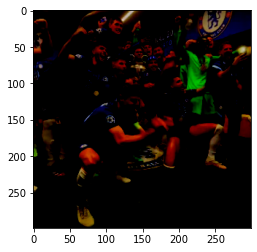

In [18]:
find = search('knee_pad')

In [19]:
existence = find[1]
existence

True

In [20]:
index = find[0]
index

12

In [21]:
model.save('predict_videos.h5')

In [22]:
class fuck:
    def __init__(self):
        self.new_pics = []
        self.pred = []
        self.exist = None
        
    def predicyFramesFromVideo(self, path):
        model = InceptionV3()
        pics = self.load_video(path)
        for image in pics:
            image = img_to_array(image)
            image = image.reshape(1, 299,299,3)
            image = preprocess_input(image)
            self.new_pics.append(image)
        predictions = []
        for image in self.new_pics:
            yhat = model.predict(image)
            predictions.append(yhat)
        encoded_predictions = []
        for yhat in predictions:
            label = decode_predictions(yhat)
            label = label[0][0]
            encoded_predictions.append(label)
        for label in encoded_predictions:
            self.pred.append(label[1])
        return self.pred
    
    def crop_center_square(self, frame):
        y, x = frame.shape[0:2]
        min_dim = min(y, x)
        start_x = (x // 2) - (min_dim // 2)
        start_y = (y // 2) - (min_dim // 2)
        return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

    def load_video(self, path, max_frames=0, resize=(299,299)):
        cap = cv2.VideoCapture(path)
        frames = []
        try:
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame = self.crop_center_square(frame)
                frame = cv2.resize(frame, resize)
                frame = frame[:, :, [2, 1, 0]]
                frames.append(frame)

                if len(frames) == max_frames:
                    break
        finally:
            cap.release()
        return np.array(frames)
    
    def search(self, search):
        count = None
        exist = False
        for i in range(len(self.pred)):
            if self.pred[i] == search:
                count = i
                exist = True
                break
        if count != None:
            plt.imshow((self.new_pics[count].reshape(299,299,3)))
        return exist
    
    def unique_val(self):
        unique_pred = []
        for val in self.pred:
            if val not in unique_pred:
                unique_pred.append(val)
        print(unique_pred, '\t and the unique values are \t', len(unique_pred))

In [23]:
f = fuck()

In [24]:
f.predicyFramesFromVideo('chele.mp4')

['paddle',
 'paddle',
 'paddle',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'paddle',
 'bathing_cap',
 'bathing_cap',
 'basketball',
 'knee_pad',
 'knee_pad',
 'knee_pad',
 'rugby_ball',
 'paddle',
 'paddle',
 'knee_pad',
 'basketball',
 'basketball',
 'rugby_ball',
 'bathing_cap',
 'bathing_cap',
 'stretcher',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'stretcher',
 'stretcher',
 'basketball',
 'basketball',
 'rugby_ball',
 'basketball',
 'stretcher',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'basketball',
 'paddle',
 'paddle',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'rugby_ball',
 'rugby_ball',
 'paddle',
 'paddle',
 'balloon',
 'rugby_ball',
 'paddle',
 'stretcher',
 'stretcher',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'stretcher',
 'stretcher',
 'toyshop',
 'basketball',
 'balloon',


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

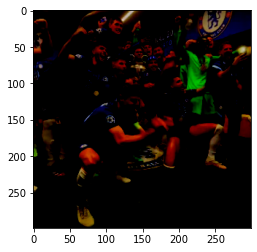

In [25]:
f.search('knee_pad')

In [26]:
f.unique_val()

['paddle', 'basketball', 'bathing_cap', 'knee_pad', 'rugby_ball', 'stretcher', 'balloon', 'toyshop', 'balance_beam', 'parachute', 'drumstick', 'torch', 'stage', 'violin', 'theater_curtain', 'pajama', 'plunger', 'oboe', 'cornet', 'ocarina', 'whistle', 'barbershop', 'football_helmet', 'mortarboard', 'soccer_ball', 'swing', 'unicycle'] 	 and the unique values are 	 27


In [27]:
f.pred

['paddle',
 'paddle',
 'paddle',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'paddle',
 'bathing_cap',
 'bathing_cap',
 'basketball',
 'knee_pad',
 'knee_pad',
 'knee_pad',
 'rugby_ball',
 'paddle',
 'paddle',
 'knee_pad',
 'basketball',
 'basketball',
 'rugby_ball',
 'bathing_cap',
 'bathing_cap',
 'stretcher',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'stretcher',
 'stretcher',
 'basketball',
 'basketball',
 'rugby_ball',
 'basketball',
 'stretcher',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'rugby_ball',
 'basketball',
 'paddle',
 'paddle',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'rugby_ball',
 'rugby_ball',
 'paddle',
 'paddle',
 'balloon',
 'rugby_ball',
 'paddle',
 'stretcher',
 'stretcher',
 'basketball',
 'basketball',
 'basketball',
 'basketball',
 'stretcher',
 'stretcher',
 'toyshop',
 'basketball',
 'balloon',


In [28]:
f.new_pics

[array([[[[-0.19999999, -0.2862745 , -0.40392154],
          [-0.19215685, -0.27843136, -0.3960784 ],
          [-0.18431371, -0.27058822, -0.38823527],
          ...,
          [-0.02745098, -0.0745098 ,  0.09803927],
          [-0.02745098, -0.0745098 ,  0.09803927],
          [-0.02745098, -0.0745098 ,  0.09803927]],
 
         [[-0.19999999, -0.2862745 , -0.40392154],
          [-0.19215685, -0.27843136, -0.3960784 ],
          [-0.19215685, -0.27843136, -0.3960784 ],
          ...,
          [-0.02745098, -0.0745098 ,  0.10588241],
          [-0.02745098, -0.0745098 ,  0.10588241],
          [-0.02745098, -0.0745098 ,  0.10588241]],
 
         [[-0.19999999, -0.2862745 , -0.40392154],
          [-0.19215685, -0.27843136, -0.3960784 ],
          [-0.19215685, -0.27843136, -0.3960784 ],
          ...,
          [-0.02745098, -0.0745098 ,  0.11372554],
          [-0.02745098, -0.0745098 ,  0.11372554],
          [-0.03529412, -0.08235294,  0.11372554]],
 
         ...,
 
         [[-

In [41]:
class aiwa:
    def ehe(self):
        a = 5

In [42]:
a = aiwa()

In [46]:
a.ehe().a

AttributeError: 'NoneType' object has no attribute 'a'